In [1]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import torch

In [12]:
embed_classwise = {}
fea_path = "/home/vaibhav/Desktop/stud/datasets/esmart/features/roi"

In [13]:
!ls

classwise_features.pkl	  feature_viz.ipynb	     labels_mod_subseq.json
classwise_GTfeatures.pkl  feature_viz_with_gt.ipynb  modify_labels.py
data			  GTfeatures		     subsequence_from_vids.py
det.txt			  gt.txt		     subsequence.ipynb
embed_viz.ipynb		  labels.json
features		  labels_mod.json


In [15]:
for im in os.listdir(fea_path):
    x = {}
    with open(os.path.join(fea_path,im), 'rb') as f:
        try:
            x = pickle.load(f)
        except:
            print(os.path.join(fea_path))
    idx = 0
    for i in x['preds']:
        if embed_classwise.get(i.item()) == None:
            embed_classwise[i.item()] = [x['features'][idx].numpy()]
        else:
            embed_classwise[i.item()].append(x['features'][idx].numpy())
        idx += 1

In [4]:
with open('classwise_features.pkl', 'wb') as f:
        pickle.dump(embed_classwise, f)

In [5]:
with open('classwise_features.pkl', 'rb') as f:
        embed_classwise = pickle.load(f)

In [16]:
l = list(embed_classwise.keys())
l.sort()
l

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 24,
 25,
 26,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 45,
 46,
 47,
 53,
 54,
 56,
 58,
 60,
 61,
 62,
 63,
 67,
 69,
 71,
 72,
 73,
 74,
 75,
 79]

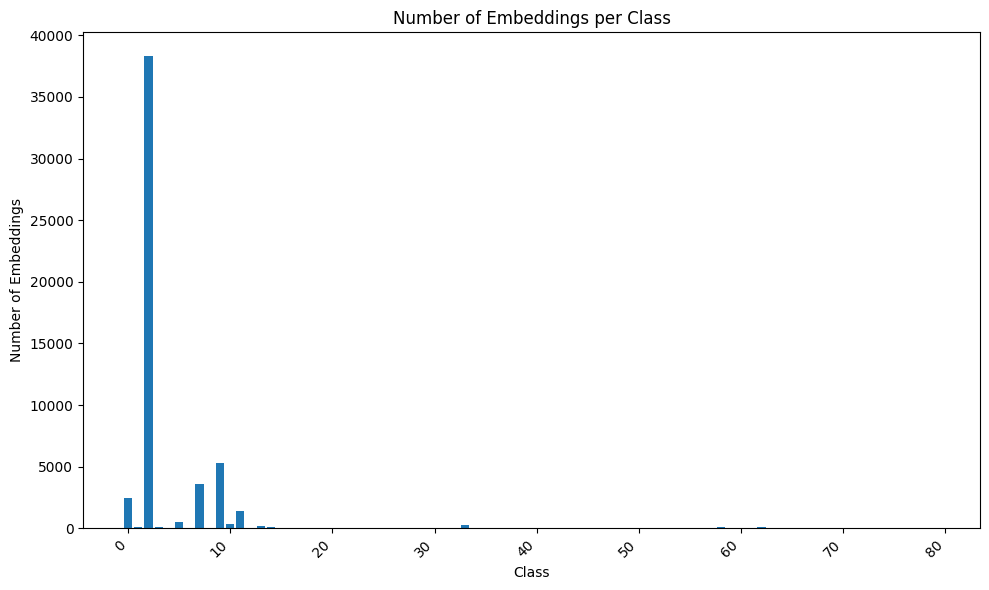

In [17]:
class_counts = {class_label: len(embeddings) for class_label, embeddings in embed_classwise.items()}

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Embeddings')
plt.title('Number of Embeddings per Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
# just selecting the first 15 classes for viz
class_embeddings = {i:embed_classwise[i] for i in embed_classwise.keys()}

In [15]:
x['preds']['instances'].pred_classes[0].item()

2

In [32]:
x['features'].shape

torch.Size([6, 256, 7, 7])

In [22]:
[i for i in x['preds']['instances'].pred_classes]

[tensor(2, device='cuda:0'),
 tensor(2, device='cuda:0'),
 tensor(2, device='cuda:0'),
 tensor(2, device='cuda:0'),
 tensor(2, device='cuda:0'),
 tensor(2, device='cuda:0')]

In [28]:
# Extract embeddings and corresponding class labels
all_embeddings = []
class_labels = []
for class_label, embeddings in class_embeddings.items():
    all_embeddings.extend(embeddings)
    class_labels.extend([class_label] * len(embeddings))

# Convert to numpy arrays
all_embeddings = np.array(all_embeddings)
class_labels = np.array(class_labels)
num_sample = class_labels.shape[0]
all_embeddings = all_embeddings.reshape(num_sample,-1)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2000)  # Adjust the number of components as needed
pca_embeddings = pca.fit_transform(all_embeddings)

# Compute t-SNE embeddings on PCA embeddings
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_embeddings = tsne.fit_transform(pca_embeddings)

In [22]:
all_embeddings.shape,class_labels.shape

((53562, 12544), (53562,))

In [20]:
class_labels

array([ 2,  2,  2, ..., 38, 71, 71])

### All COCO labels

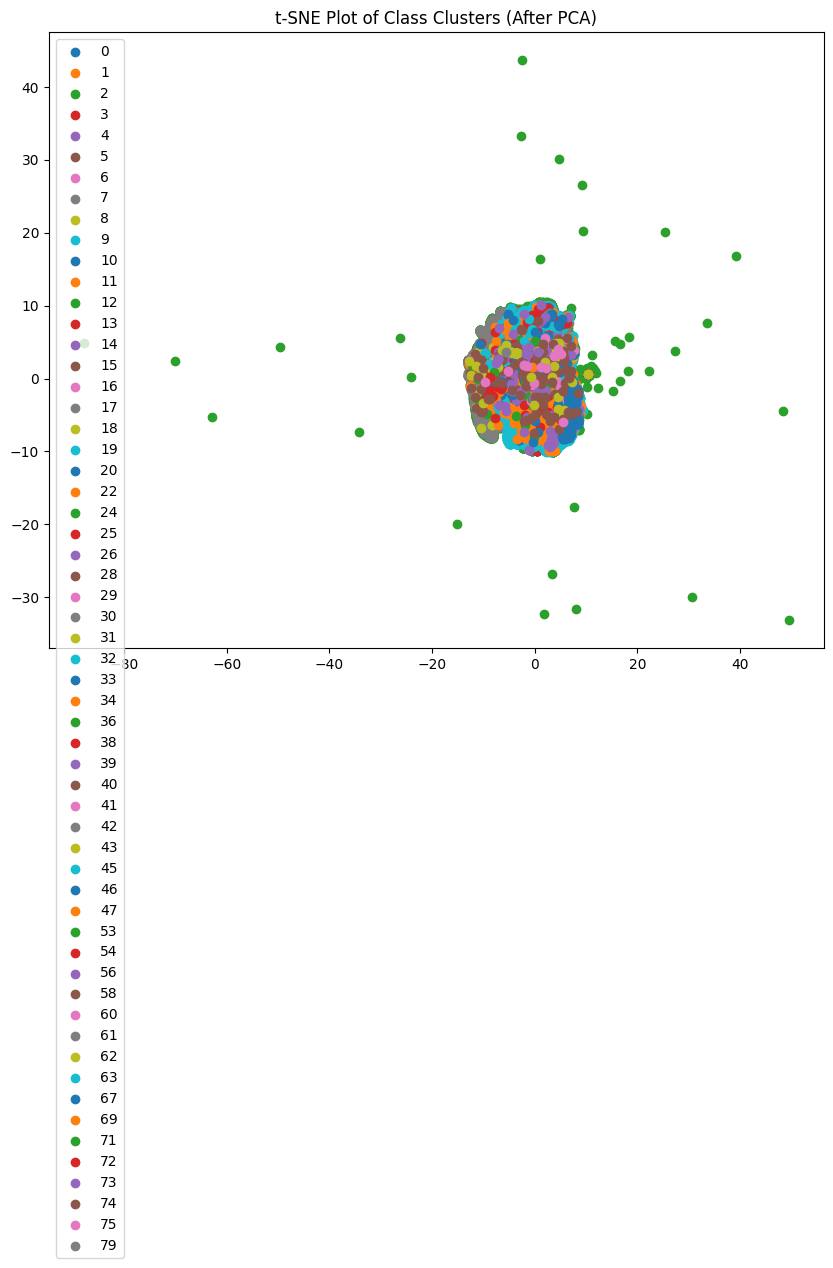

In [23]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
unique_labels = np.unique(class_labels)
for label in unique_labels:
    indices = np.where(class_labels == label)
    plt.scatter(tsne_embeddings[indices, 0], tsne_embeddings[indices, 1], label=label)

plt.title('t-SNE Plot of Class Clusters (After PCA)')
plt.legend()
plt.show()

### First 15 classes

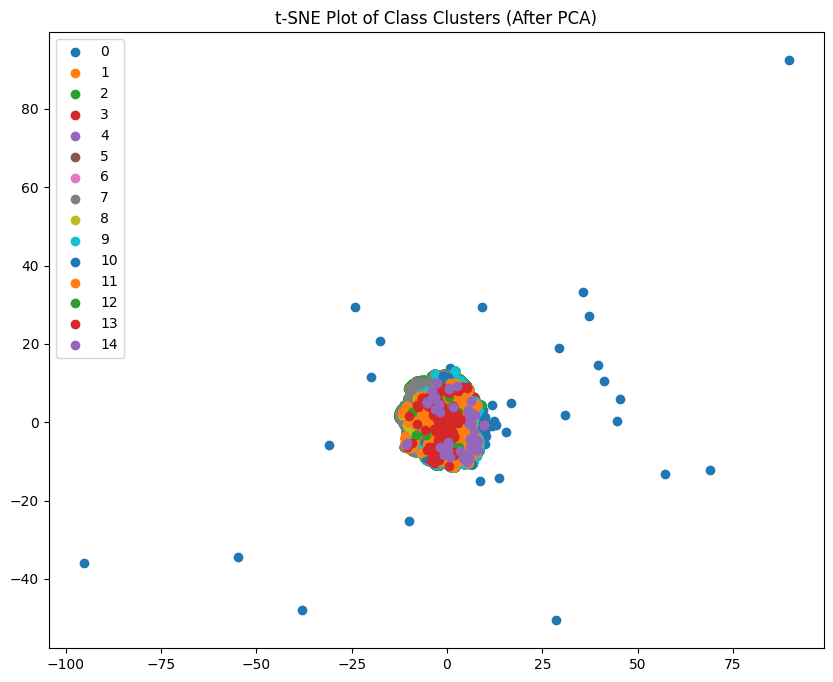

In [10]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
unique_labels = np.unique(class_labels)
for label in unique_labels:
    indices = np.where(class_labels == label)
    plt.scatter(tsne_embeddings[indices, 0], tsne_embeddings[indices, 1], label=label)

plt.title('t-SNE Plot of Class Clusters (After PCA)')
plt.legend()
plt.show()

In [8]:
from sklearn import svm

In [ ]:
clf = svm.LinearSVC()
clf.fit(pca_embeddings, class_labels)

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
y_pred = clf.predict(pca_embeddings)
y = class_labels

# Calculate and display training metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

print("Training Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

In [2]:
embed_classwise = {}
fea_path = "/home/vaibhav/Desktop/stud/datasets/esmart/features/pooled"

In [3]:
for im in os.listdir(fea_path):
    x = {}
    with open(os.path.join(fea_path,im), 'rb') as f:
        try:
            x = pickle.load(f)
        except:
            print(os.path.join(fea_path))
    idx = 0
    for i in x['preds']:
        if embed_classwise.get(i.item()) == None:
            embed_classwise[i.item()] = [x['features'][idx].numpy()]
        else:
            embed_classwise[i.item()].append(x['features'][idx].numpy())
        idx += 1

In [4]:
# just selecting the first 15 classes for viz
class_embeddings = {i:embed_classwise[i] for i in embed_classwise.keys()}

In [5]:
# Extract embeddings and corresponding class labels
all_embeddings = []
class_labels = []
for class_label, embeddings in class_embeddings.items():
    all_embeddings.extend(embeddings)
    class_labels.extend([class_label] * len(embeddings))

# Convert to numpy arrays
all_embeddings = np.array(all_embeddings)
class_labels = np.array(class_labels)
num_sample = class_labels.shape[0]
all_embeddings = all_embeddings.reshape(num_sample,-1)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=50)  # Adjust the number of components as needed
pca_embeddings = pca.fit_transform(all_embeddings)

# Compute t-SNE embeddings on PCA embeddings
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_embeddings = tsne.fit_transform(pca_embeddings)

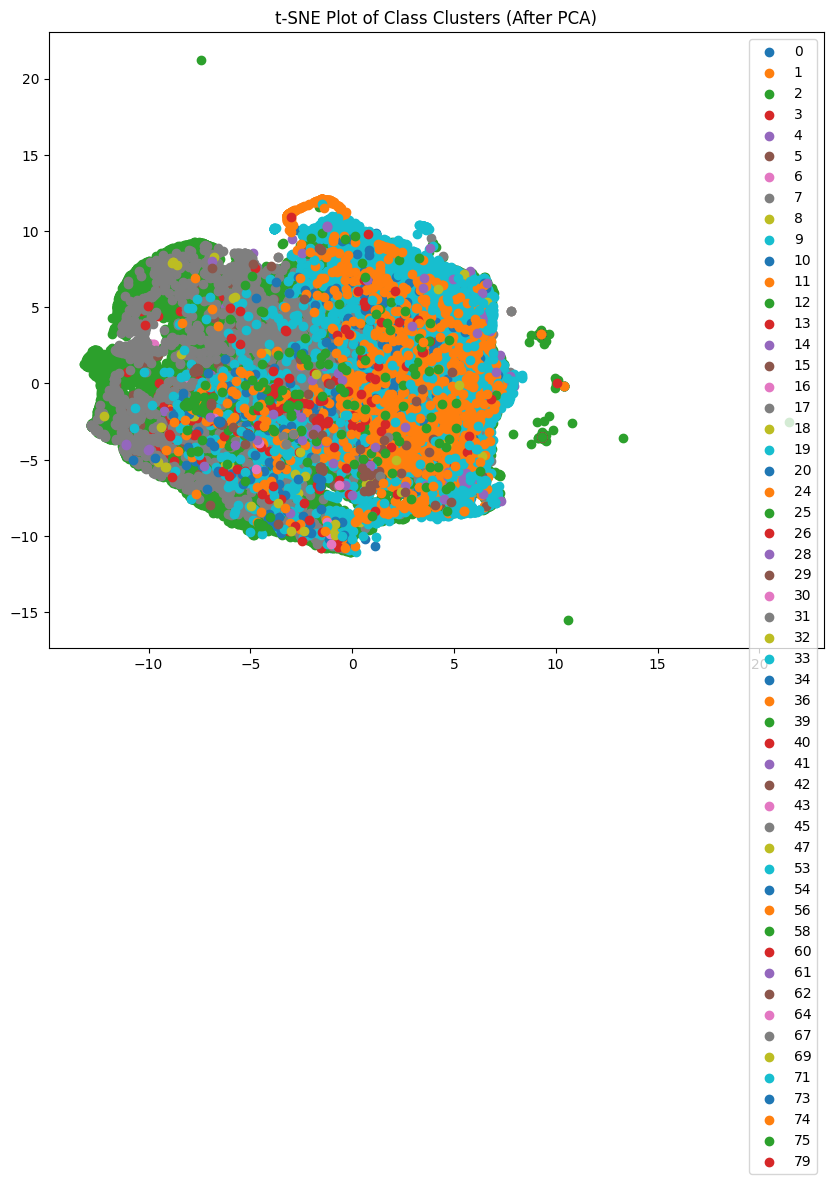

In [6]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
unique_labels = np.unique(class_labels)
for label in unique_labels:
    indices = np.where(class_labels == label)
    plt.scatter(tsne_embeddings[indices, 0], tsne_embeddings[indices, 1], label=label)

plt.title('t-SNE Plot of Class Clusters (After PCA)')
plt.legend()
plt.show()

In [9]:
clf = svm.LinearSVC()
clf.fit(all_embeddings, class_labels)

/home/vaibhav/Desktop/detectron2/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [11]:
y_pred = clf.predict(all_embeddings)
y = class_labels

# Calculate and display training metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

print("Training Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Training Metrics:
Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1-score: 0.78


/home/vaibhav/Desktop/detectron2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### COCO trained model with esmart GT boxes visualization

In [12]:
embed_classwise = {}
fea_path = "/home/vaibhav/Desktop/stud/datasets/esmart/GTfeatures"

In [18]:
for im in os.listdir(fea_path):
    x = {}
    with open(os.path.join(fea_path,im), 'rb') as f:
        x = pickle.load(f)
    idx = 0
    for i in x['preds']:
        if embed_classwise.get(i.item()) == None:
            embed_classwise[i.item()] = [x['features'][idx].detach().cpu().numpy()]
        else:
            embed_classwise[i.item()].append(x['features'][idx].detach().cpu().numpy())
        idx += 1

In [19]:
embed_classwise.keys()

dict_keys([8, 4, 2, 11, 10, 9, 7, 3, 5, 1, 6, 0])

In [20]:
with open('classwise_GTfeatures.pkl', 'wb') as f:
        pickle.dump(embed_classwise, f)

In [21]:
with open('classwise_GTfeatures.pkl', 'rb') as f:
        embed_classwise = pickle.load(f)

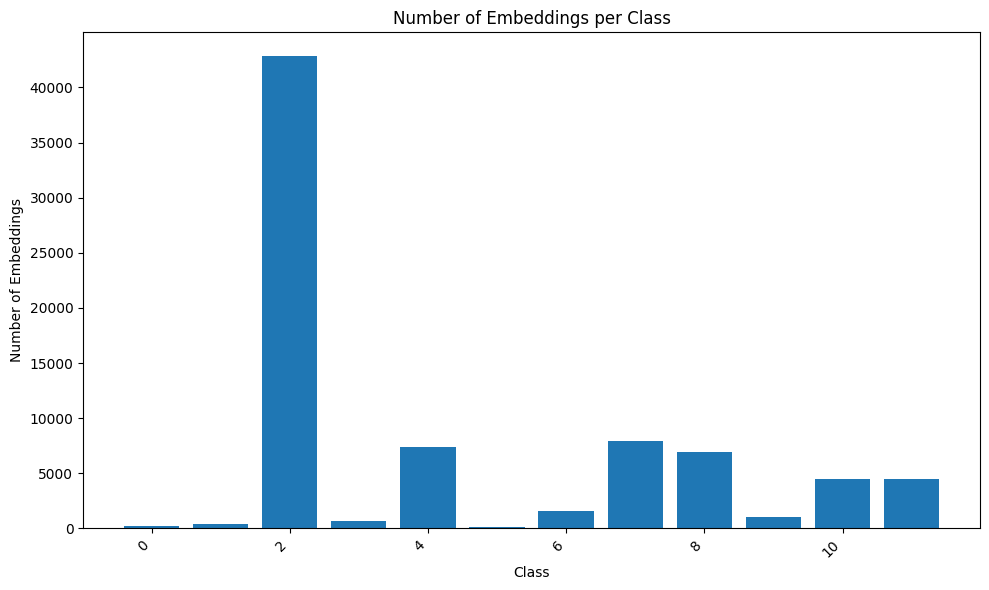

In [22]:
class_counts = {class_label: len(embeddings) for class_label, embeddings in embed_classwise.items()}

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Embeddings')
plt.title('Number of Embeddings per Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
# Extract embeddings and corresponding class labels
all_embeddings = []
class_labels = []
for class_label, embeddings in embed_classwise.items():
    all_embeddings.extend(embeddings)
    class_labels.extend([class_label] * len(embeddings))

# Convert to numpy arrays
all_embeddings = np.array(all_embeddings)
class_labels = np.array(class_labels)
num_sample = class_labels.shape[0]
all_embeddings = all_embeddings.reshape(num_sample,-1)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=50)  # Adjust the number of components as needed
pca_embeddings = pca.fit_transform(all_embeddings)

# Compute t-SNE embeddings on PCA embeddings
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_embeddings = tsne.fit_transform(pca_embeddings)

In [26]:
all_embeddings.shape,class_labels.shape

((78050, 12544), (78050,))

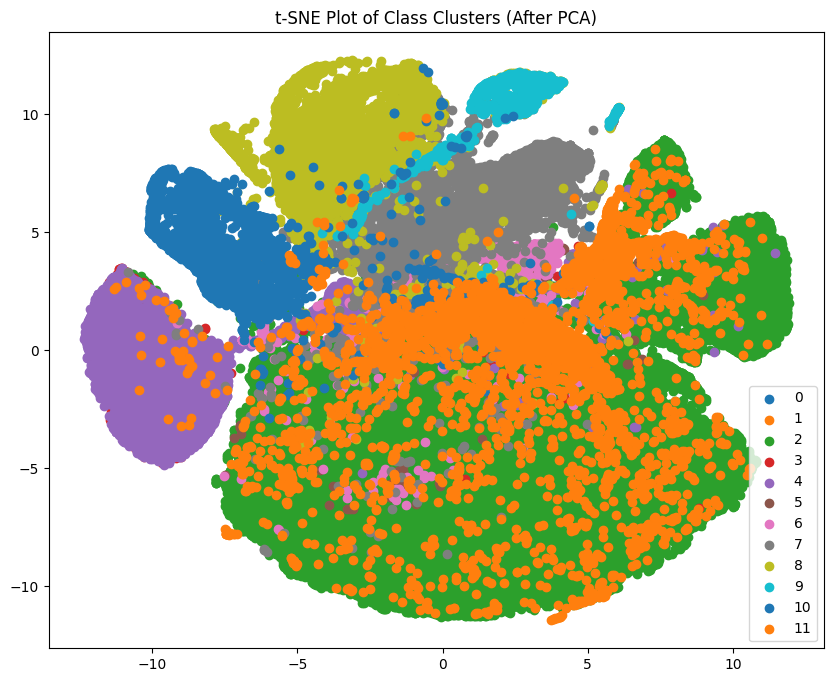

In [27]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
unique_labels = np.unique(class_labels)
for label in unique_labels:
    indices = np.where(class_labels == label)
    plt.scatter(tsne_embeddings[indices, 0], tsne_embeddings[indices, 1], label=label)

plt.title('t-SNE Plot of Class Clusters (After PCA)')
plt.legend([
                        "bicycle","bus","car","lane","lanes","motorcycle","person",
                        "roadwork_tcd","speed_limit","stop sign", "traffic light",
                        "truck"
                          ])
plt.show()